# Exploratory Data Analysis

The aim of this project is to predict developers' salaries based on their tech stack, country of residence and other features. For this, we will be utilizing 2021 stackoverflow developers' data gathered for developers across the world in different careers. 

In [72]:
#First we import our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import chi2_contingency
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [73]:
#Read in the data
df=pd.read_csv(r'C:\Users\JESSICA\Environments\salaries\data\stackoverflow survey_results_public.csv')
df.head()

ResponseId                                         MainBranch  \
0           1                     I am a developer by profession   
1           2             I am a student who is learning to code   
2           3  I am not primarily a developer, but I write co...   
3           4                     I am a developer by profession   
4           5                     I am a developer by profession   

                                          Employment  \
0  Independent contractor, freelancer, or self-em...   
1                                 Student, full-time   
2                                 Student, full-time   
3                                 Employed full-time   
4  Independent contractor, freelancer, or self-em...   

                                             Country US_State UK_Country  \
0                                           Slovakia      NaN        NaN   
1                                        Netherlands      NaN        NaN   
2                                 Russian Federation      NaN        NaN   
3                                            Austria      NaN        NaN   
4  United Kingdom of Great Britain and Northern I...      NaN    England   

                                             EdLevel     Age1stCode  \
0  Secondary school (e.g. American high school, G...  18 - 24 years   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  11 - 17 years   
2       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  11 - 17 years   
3    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  11 - 17 years   
4    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   5 - 10 years   

                                           LearnCode YearsCode YearsCodePro  \
0  Coding Bootcamp;Other online resources (ex: vi...       NaN          NaN   
1  Other online resources (ex: videos, blogs, etc...         7          NaN   
2  Other online resources (ex: videos, blogs, etc...       NaN          NaN   
3                                                NaN       NaN          NaN   
4                            Friend or family member        17           10   

                                             DevType  \
0                                  Developer, mobile   
1                                                NaN   
2                                                NaN   
3                               Developer, front-end   
4  Developer, desktop or enterprise applications;...   

                                             OrgSize             Currency  \
0                                 20 to 99 employees    EUR European Euro   
1                                                NaN                  NaN   
2                                                NaN                  NaN   
3                               100 to 499 employees    EUR European Euro   
4  Just me - I am a freelancer, sole proprietor, ...  GBP\tPound sterling   

   CompTotal CompFreq                         LanguageHaveWorkedWith  \
0     4800.0  Monthly  C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift   
1        NaN      NaN                              JavaScript;Python   
2        NaN      NaN                       Assembly;C;Python;R;Rust   
3        NaN  Monthly                          JavaScript;TypeScript   
4        NaN      NaN                 Bash/Shell;HTML/CSS;Python;SQL   

           LanguageWantToWorkWith          DatabaseHaveWorkedWith  \
0                           Swift               PostgreSQL;SQLite   
1                             NaN                      PostgreSQL   
2               Julia;Python;Rust                          SQLite   
3           JavaScript;TypeScript                             NaN   
4  Bash/Shell;HTML/CSS;Python;SQL  Elasticsearch;PostgreSQL;Redis   

                     DatabaseWantToWorkWith PlatformHaveWorkedWith  \
0                                    SQLite                    NaN   
1                                       NaN                    NaN   
2                                    SQL

In [74]:
#Shape of dataframe
df.shape

(83439, 48)

The dataset has over 80000 instances with 48 features

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

There are features with missing values that we will definitely need to look into

In [76]:
df.describe()

ResponseId     CompTotal  ConvertedCompYearly
count  83439.000000  4.718300e+04         4.684400e+04
mean   41720.000000  2.119407e+69         1.184262e+05
std    24086.908893  4.603702e+71         5.272944e+05
min        1.000000  0.000000e+00         1.000000e+00
25%    20860.500000  1.600000e+04         2.702500e+04
50%    41720.000000  6.700000e+04         5.621100e+04
75%    62579.500000  1.400000e+05         1.000000e+05
max    83439.000000  1.000000e+74         4.524131e+07

In [77]:
df.isna().sum()

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

Stackoverflow also provides a schema file that explains the features of the dataset. We will read that file also.

In [78]:
#reading the schema file 
schema=pd.read_csv(r'C:\Users\JESSICA\Environments\salaries\data\stackoverflow survey_results_schema.csv')
schema.head()

qid       qname                                           question  \
0  QID16          S0  <div><span style="font-size:19px;"><strong>Hel...   
1  QID12    MetaInfo                                  Browser Meta Info   
2   QID1          S1  <span style="font-size:22px; font-family: aria...   
3   QID2  MainBranch  Which of the following options best describes ...   
4  QID24  Employment  Which of the following best describes your cur...   

   force_resp  type selector  
0       False    DB       TB  
1       False  Meta  Browser  
2       False    DB       TB  
3        True    MC     SAVR  
4       False    MC     MAVR

In [79]:
schema

qid               qname  \
0    QID16                  S0   
1    QID12            MetaInfo   
2     QID1                  S1   
3     QID2          MainBranch   
4    QID24          Employment   
5     QID6             Country   
6     QID7            US_State   
7     QID9          UK_Country   
8   QID190                  S2   
9    QID25             EdLevel   
10  QID149          Age1stCode   
11  QID276           LearnCode   
12   QID32           YearsCode   
13   QID34        YearsCodePro   
14   QID31             DevType   
15   QID29             OrgSize   
16   QID50            Currency   
17   QID51           CompTotal   
18   QID52            CompFreq   
19   QID61                  S3   
20  QID233            Language   
21  QID262            Database   
22  QID263            Platform   
23  QID264            Webframe   
24  QID265            MiscTech   
25  QID275           ToolsTech   
26  QID274      NEWCollabTools   
27   QID71               OpSys   
28  QID243            NEWStuck   
29   QID91                  S4   
30  QID266          NEWSOSites   
31  QID100         SOVisitFreq   
32  QID101           SOAccount   
33  QID102          SOPartFreq   
34  QID106              SOComm   
35  QID267       NEWOtherComms   
36  QID268  NEWOtherCommsNames   
37  QID121                  S5   
38  QID127                 Age   
39  QID122              Gender   
40  QID153               Trans   
41  QID136           Sexuality   
42  QID126           Ethnicity   
43  QID124       Accessibility   
44  QID125        MentalHealth   
45  QID131                  S6   
46  QID132        SurveyLength   
47  QID133          SurveyEase   

                                             question  force_resp    type  \
0   <div><span style="font-size:19px;"><strong>Hel...       False      DB   
1                                   Browser Meta Info       False    Meta   
2   <span style="font-size:22px; font-family: aria...       False      DB   
3   Which of the following options best describes ...        True      MC   
4   Which of the following best describes your cur...       False      MC   
5   Where do you live? <span style="font-weight: b...        True      MC   
6   <p>In which state or territory of the USA do y...       False      MC   
7   In which part of the United Kingdom do you liv...       False      MC   
8   <span style="font-size:22px; font-family: aria...       False      DB   
9   Which of the following best describes the high...       False      MC   
10  At what age did you write your first line of c...       False      MC   
11  How did you learn to code? Select all that apply.       False      MC   
12  Including any education, how many years have y...       False      MC   
13  NOT including education, how many years have y...       False      MC   
14  Which of the following describes your current ...       False      MC   
15  Approximately how many people are employed by ...       False      MC   
16  Which currency do you use day-to-day? If your ...        True      MC   
17  What is your current total compensation (salar...       False      TE   
18   Is that compensation weekly, monthly, or yearly?       False      MC   
19  <span style="font-size:22px; font-family: aria...       False      DB   
20  Which <b>programming, scripting, and markup la...       False  Matrix   
21  Which <b>database environments </b>have you do...       False  Matrix   
22  Which <b>cloud platforms</b> have you done ext...       False  Matrix   
23  Which <strong>web frameworks </strong><span st...       False  Matrix   
24  Which <b>other frameworks and libraries</b> ha...       False  Matrix   
25  Which <strong>tools</strong> have you done ext...       False  Matrix   
26  Which <strong>development environments</strong...       False  Matrix   
27  What is the primary operating system in which ...       False      MC   
28  What do you do when you get stuck on a problem...       False      MC   
29  <span style="font-size:22p

# Univariate Analysis

We will analyze the features of the dataframe to find hidden insights and find features most useful to predicting our dependent variable.

Because most of our independent variables are categorical and we might want to use countplots to visualize them, we will create a visualization function to comply with coding `DRY` principles.

In [80]:
def countplot(var, dataframe):
    plt.figure(figsize=(8,8))
    total=float(len(dataframe[var]))
    sen=sns.countplot(x=var, data=dataframe)
    for g in sen.patches:
        height=g.get_height()
        sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
    plt.title(var)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.show()

* MainBranch

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."

In [81]:
#Responses for mainbranch
df['MainBranch'].unique()

array(['I am a developer by profession',
       'I am a student who is learning to code',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'None of these'], dtype=object)

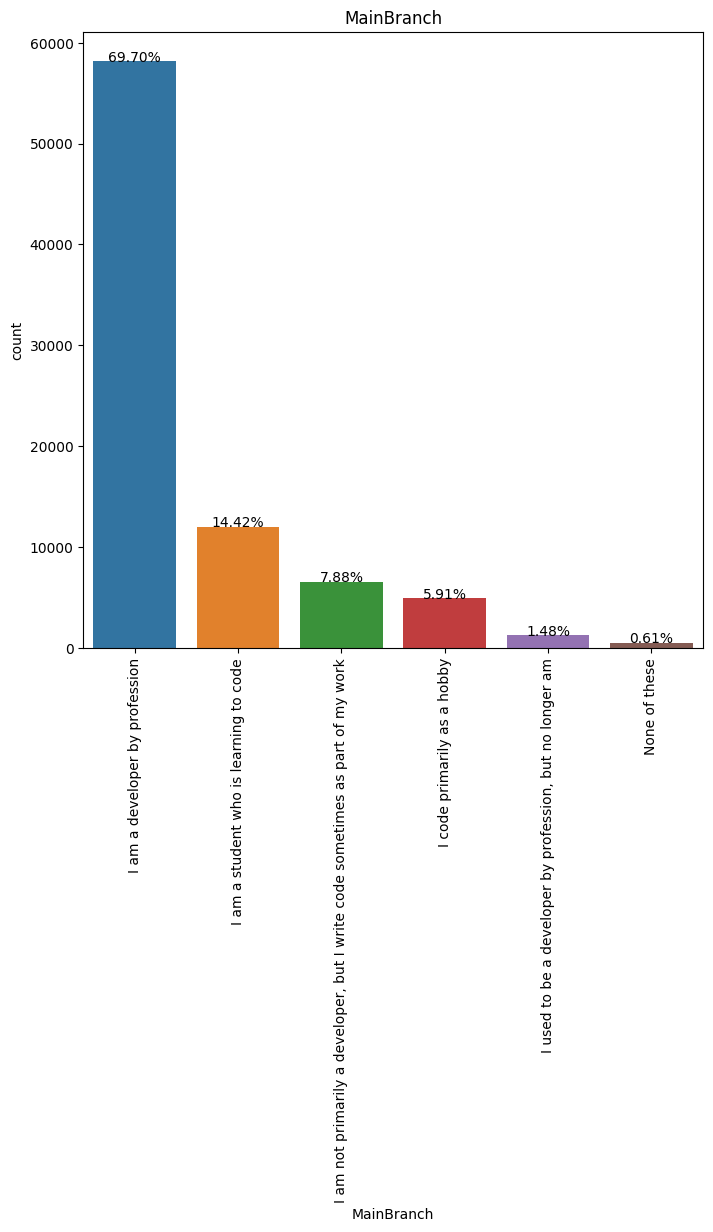

In [82]:
countplot('MainBranch', df)

For the sake of the project, we will be focusing primarily on individuals that are developers by profession.

* Employment

'Which of the following best describes your current employment status?'




In [83]:
df['Employment'].unique()

array(['Independent contractor, freelancer, or self-employed',
       'Student, full-time', 'Employed full-time', 'Student, part-time',
       'I prefer not to say', 'Employed part-time',
       'Not employed, but looking for work', 'Retired',
       'Not employed, and not looking for work', nan], dtype=object)

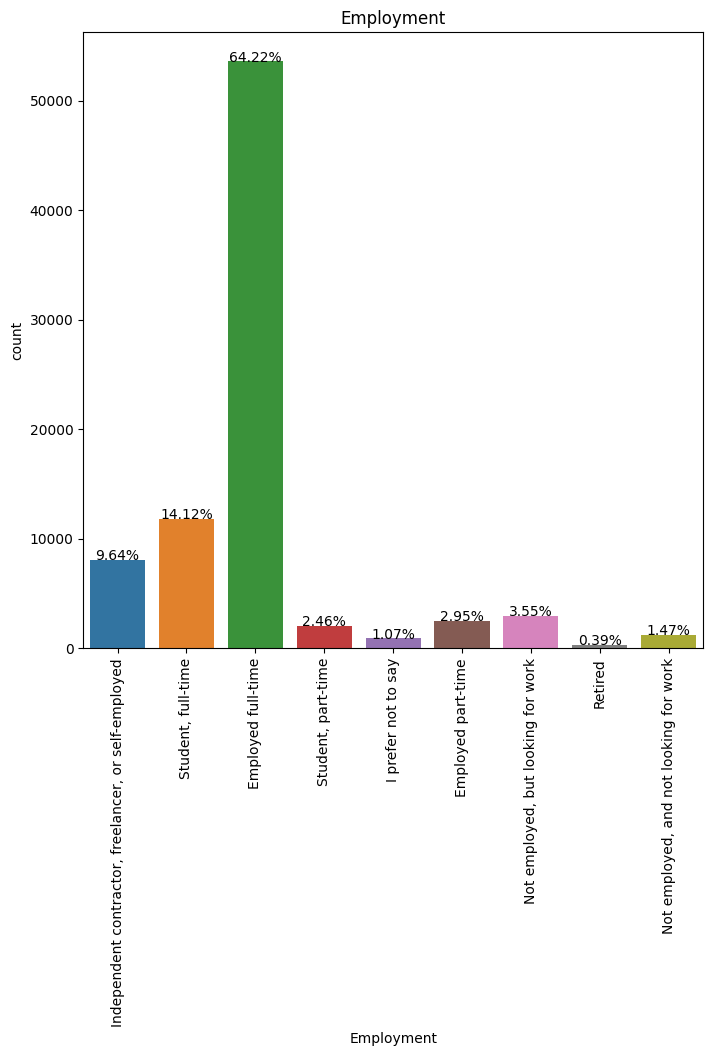

In [84]:
countplot('Employment', df)

More than 64% of developers are employed full time, 14% are students and 9% are independent contractors.

* Country

'Where do you live?'

In [85]:
#The count of each country in the dataframe
df['Country'].value_counts()

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Australia                                                1646
Spain                                                    1485
Russian Federation                                       1474
Sweden                                                   1196
China                                                    1055
Turkey                                                   1054
Switzerl

We obviously cannot make use of all countries in the dataframe, we might want to choose a sample size that is fairly representative of the population of developers in each country. We will thus make use of the top 13 highest most represented countries in terms of residency.

In [86]:
#getting the top 13 countries with the highest developer residency
country_data=df.groupby('Country').size().sort_values(ascending=False).to_frame().head(13).reset_index()



In [87]:
country_data

Country      0
0                            United States of America  15288
1                                               India  10511
2                                             Germany   5625
3   United Kingdom of Great Britain and Northern I...   4475
4                                              Canada   3012
5                                              France   2708
6                                              Brazil   2254
7                                              Poland   1805
8                                         Netherlands   1772
9                                               Italy   1666
10                                          Australia   1646
11                                              Spain   1485
12                                 Russian Federation   1474

In [88]:
country_data.rename(columns={0: 'count'}, inplace=True)

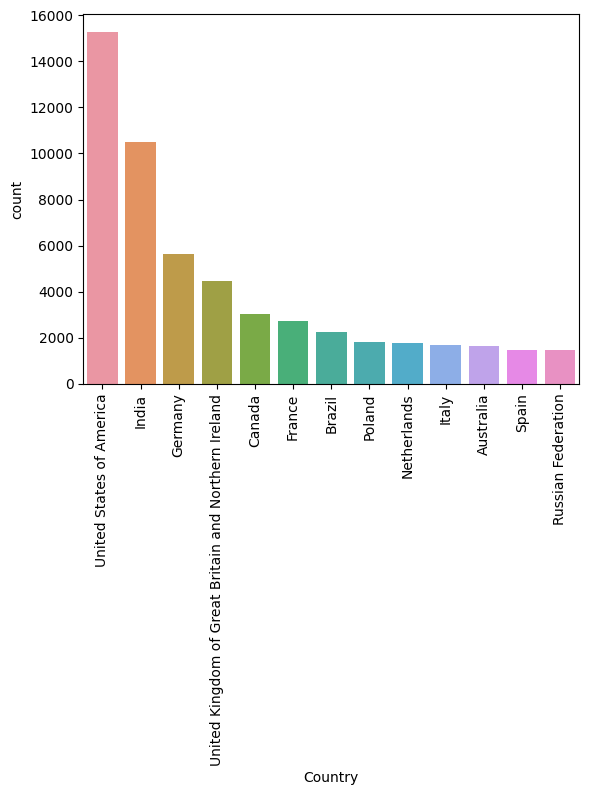

In [89]:
#plotting the dataframe generated
sns.barplot(data=country_data, x='Country', y='count')
plt.xticks(rotation=90);

* US_STATE

'In which state or territory of the USA do you live?'

In [90]:
df['US_State'].value_counts()

California                              2163
Texas                                   1023
New York                                 961
Washington                               932
Massachusetts                            624
Florida                                  613
Illinois                                 587
Colorado                                 549
Pennsylvania                             499
Virginia                                 453
Ohio                                     448
Utah                                     415
North Carolina                           403
Michigan                                 381
Oregon                                   375
Minnesota                                359
Georgia                                  356
Maryland                                 350
New Jersey                               347
Wisconsin                                266
Arizona                                  261
Missouri                                 230
Indiana   

* UK_COUNTRY

'In which part of the United Kingdom do you live?'

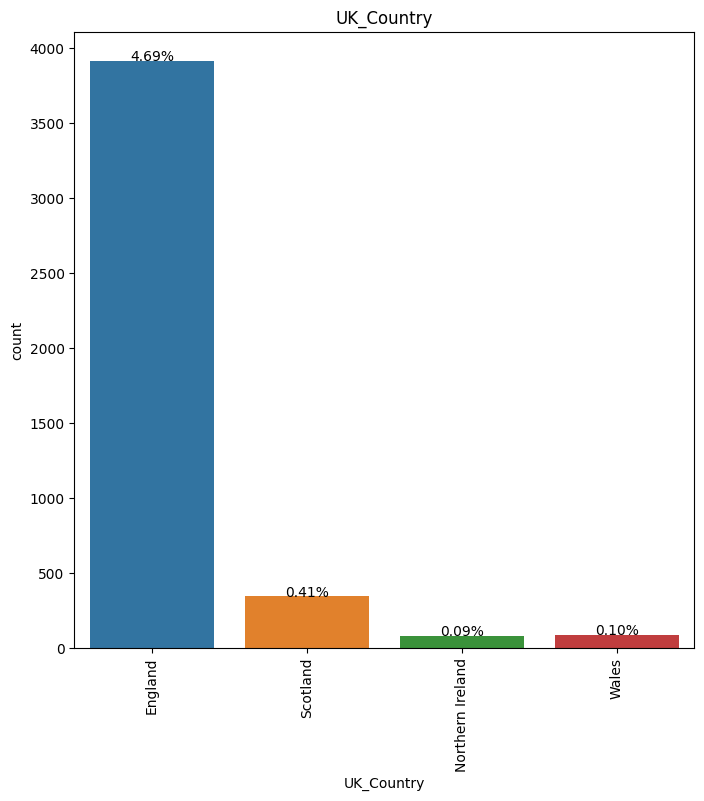

In [91]:
#Plotting UK_country
countplot('UK_Country', df)

Most of the developers surveyed that reside in the UK stay in England

* EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

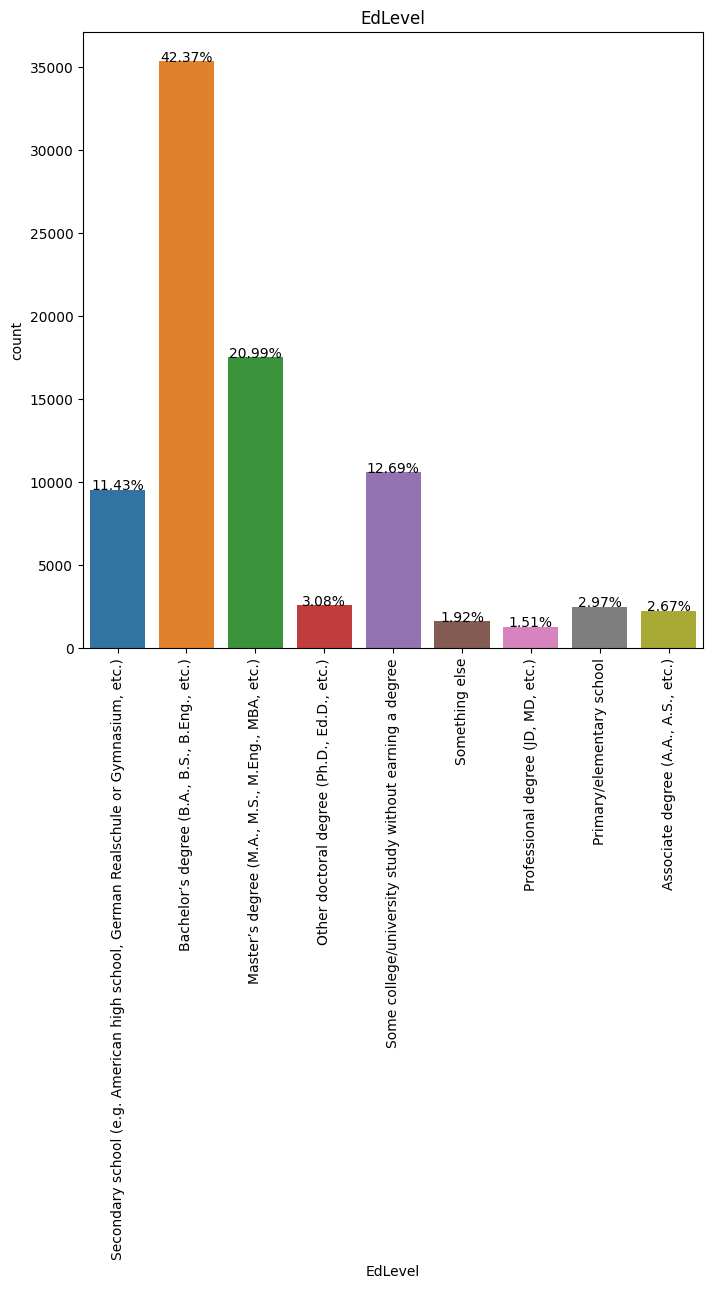

In [92]:
#Plotting EdLevel
countplot('EdLevel', df)

About 40% of developers surveyed had a Bachelor's degree, 20% had an MSc, close to 13% attended a college without getting a degree.

* Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project) '

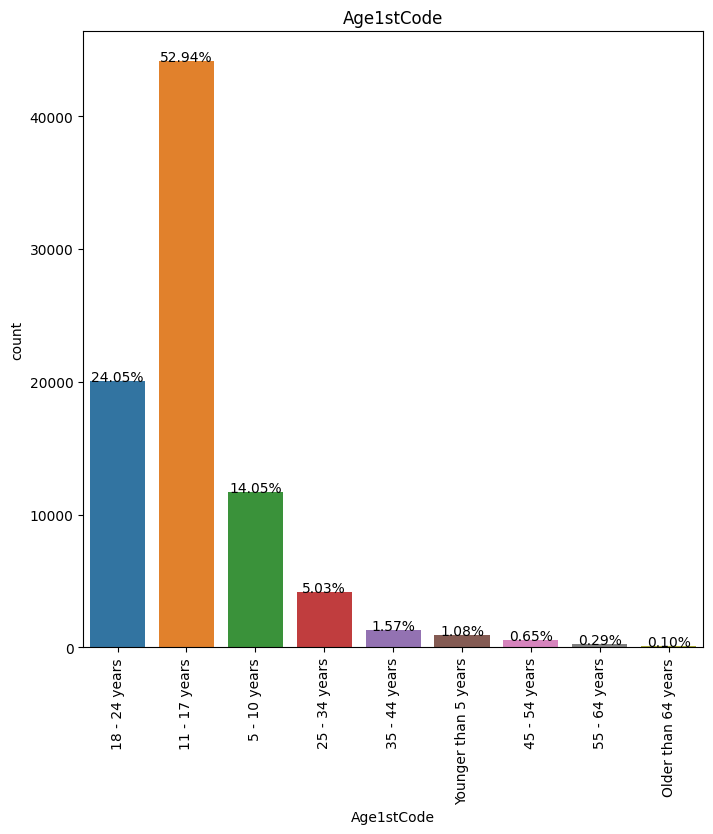

In [93]:
countplot('Age1stCode', df)

* YEARSCODE

'Including any education, how many years have you been coding in total?'

In [94]:
df['YearsCode'].unique()

array([nan, '7', '17', '3', '4', '6', '16', '12', '15', '10', '40', '9',
       '26', '14', '39', '20', '8', '19', '5', 'Less than 1 year', '22',
       '2', '1', '34', '21', '13', '25', '24', '30', '31', '18', '38',
       'More than 50 years', '27', '41', '42', '35', '23', '28', '11',
       '37', '44', '43', '36', '33', '45', '29', '50', '46', '32', '47',
       '49', '48'], dtype=object)

Change `YearsCode` datatype to float64

In [95]:
# Replace objects with integers
df.replace({'More than 50 years': 50, 'Less than 1 year':0}, inplace=True)

In [96]:
#Changing datatype of 'YearsCode'
df['YearsCode']=df['YearsCode'].astype(float)

Text(0.5, 1.0, 'Years Of Code')

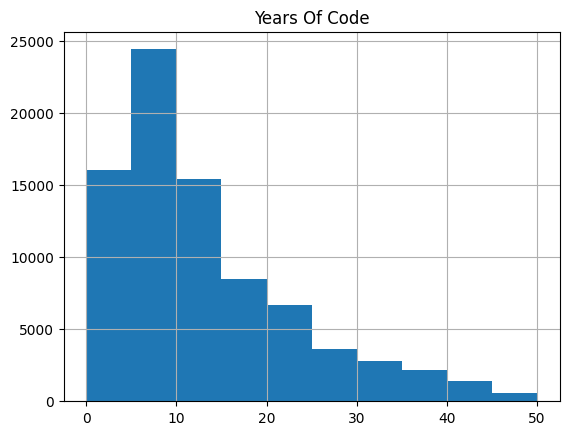

In [97]:
#Histogram of years of code
df['YearsCode'].hist()
plt.title('Years Of Code')

* YEARSCODEPRO

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [98]:
df['YearsCodePro'].unique()

array([nan, '10', '4', '5', '6', '2', '30', '9', '18', '12', '21', '1',
       '16', 0, '15', '3', '35', '7', '8', '17', '14', '26', '25', '20',
       '50', '34', '11', '24', '22', '13', '31', '23', '39', '41', '27',
       '28', '19', '33', 50, '37', '29', '32', '43', '40', '38', '45',
       '42', '46', '36', '44', '47', '48', '49'], dtype=object)

In [99]:
df['YearsCodePro']=df['YearsCodePro'].astype(float)

(0.0, 10.0)

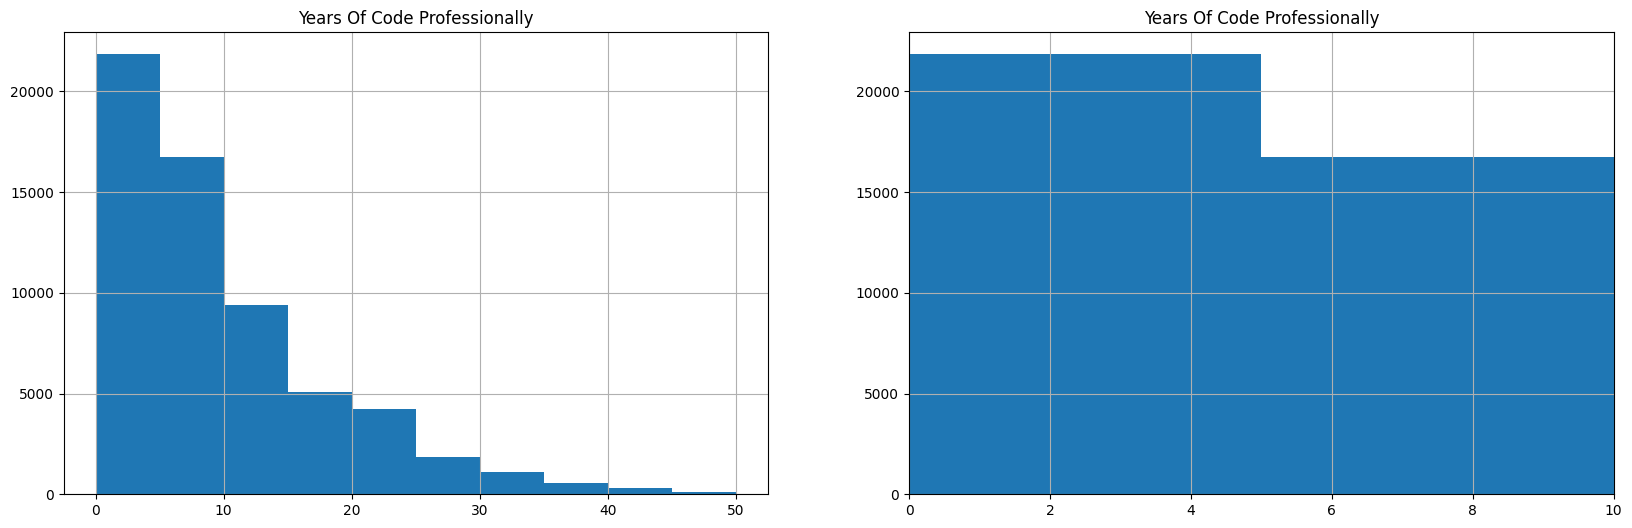

In [100]:
#histograms of years of professional coding experience
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
df['YearsCodePro'].hist()
plt.title('Years Of Code Professionally')

plt.subplot(1,2,2)
df['YearsCodePro'].hist()
plt.title('Years Of Code Professionally')
plt.xlim((0,10))

From our plots, it is obvious we have a right skewed distribution in age with most developers surveyed having professional coding experience of less than 6 years. 

* DEVTYPE

'Which of the following describes your current job?'

In [101]:
df['DevType'].unique()

array(['Developer, mobile', nan, 'Developer, front-end', ...,
       'Developer, mobile;Developer, front-end;Developer, full-stack;Developer, back-end;Database administrator;Developer, embedded applications or devices;System administrator;Educator',
       'Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, embedded applications or devices;Engineering manager;Educator',
       'Developer, mobile;Developer, desktop or enterprise applications;Data scientist or machine learning specialist;Developer, back-end;Engineering manager'],
      dtype=object)

In [102]:
df['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   8601
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                        

Due to the nature of responses for this feature, it will be needing some feature engineering and cleaning up to gain insights.

* ORGSIZE

'Approximately how many people are employed by the company or organization you currently work for? '

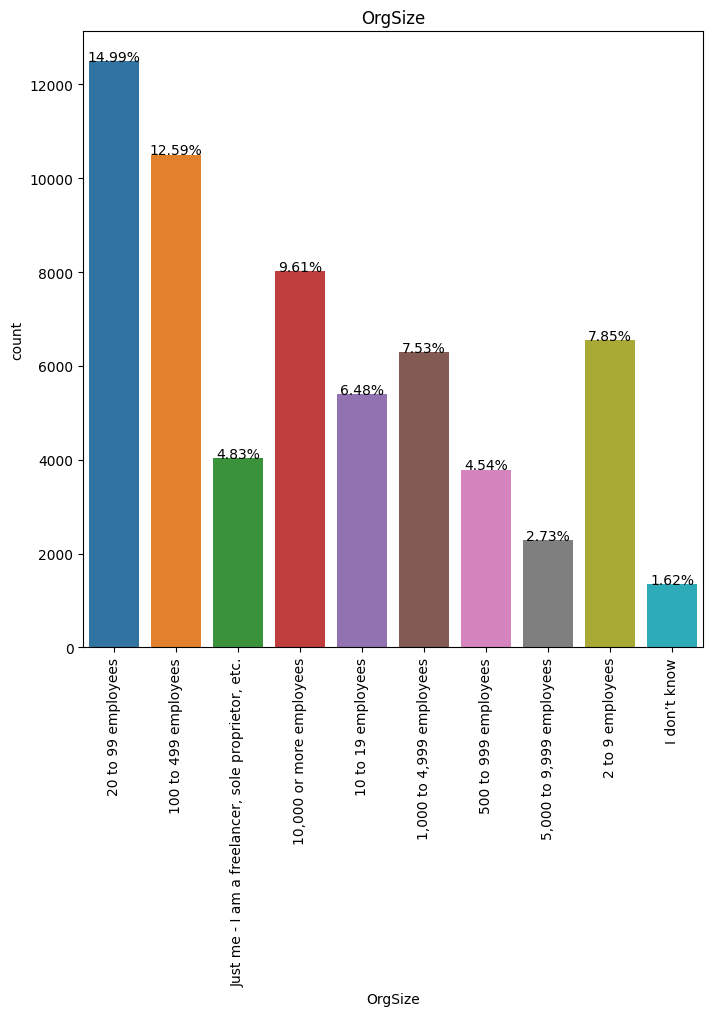

In [103]:
countplot('OrgSize', df)

Close to 15% of developers surveyed work for organizations with 20 to 99 employees, close to 13% work for organizations with 100 to 499 employees and more than 9% work in very large firms with 10,000 or more employees.

* COMPTOTAL

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in $ Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

Text(0.5, 1.0, 'Current Total Compensation')

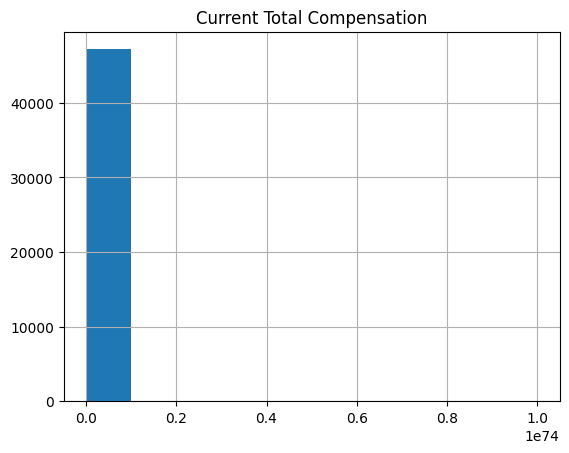

In [104]:
#histogram of comptotal
df['CompTotal'].hist()
plt.title('Current Total Compensation')


It is quite obvious there are errors in entering values we need to take care of.

<AxesSubplot: xlabel='CompTotal'>

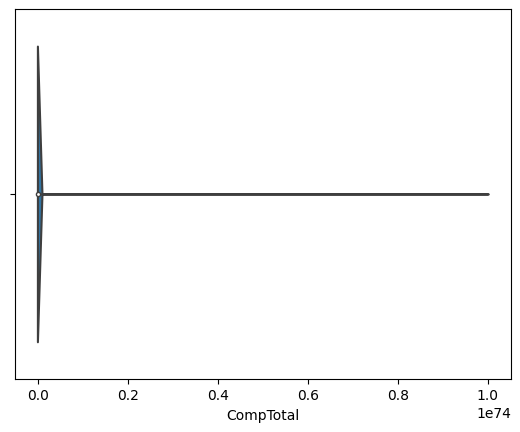

In [105]:
#plotting a violin plot to see extreme outliers
sns.violinplot(data=df, x='CompTotal')

In [106]:
df[df['CompTotal']==df['CompTotal'].max()]

ResponseId                      MainBranch          Employment Country  \
6378        6379  I am a developer by profession  Employed full-time  Canada   

     US_State UK_Country                                            EdLevel  \
6378      NaN        NaN  Some college/university study without earning ...   

         Age1stCode                                        LearnCode  \
6378  11 - 17 years  Other online resources (ex: videos, blogs, etc)   

      YearsCode  YearsCodePro              DevType                   OrgSize  \
6378       20.0          10.0  Developer, back-end  1,000 to 4,999 employees   

                       Currency     CompTotal CompFreq  \
6378  USD\tUnited States dollar  1.000000e+74   Weekly   

                                 LanguageHaveWorkedWith  \
6378  Bash/Shell;HTML/CSS;JavaScript;Python;Ruby;Rus...   

     LanguageWantToWorkWith         DatabaseHaveWorkedWith  \
6378        Rust;TypeScript  MySQL;PostgreSQL;Redis;SQLite   

       DatabaseWantToWorkWith PlatformHaveWorkedWith PlatformWantToWorkWith  \
6378  PostgreSQL;Redis;SQLite                    AWS                    NaN   

                     WebframeHaveWorkedWith WebframeWantToWorkWith  \
6378  Django;FastAPI;React.js;Ruby on Rails                    NaN   

     MiscTechHaveWorkedWith MiscTechWantToWorkWith ToolsTechHaveWorkedWith  \
6378                    NaN                    NaN         Deno;Docker;Git   

     ToolsTechWantToWorkWith              NEWCollabToolsHaveWorkedWith  \
6378             Deno;Docker  IntelliJ;Sublime Text;Visual Studio Code   

                  NEWCollabToolsWantToWorkWith  \
6378  IntelliJ;Sublime Text;Visual Studio Code   

                                  OpSys  \
6378  Windows Subsystem for Linux (WSL)   

                                               NEWStuck  \
6378  Go for a walk or other physical activity;Do ot...   

                                             NEWSOSites  \
6378  Stack Overflow;Stack Exchange;Stack Overflow f...   

                          SOVisitFreq SOAccount              SOPartFreq  \
6378  A few times per month or weekly       Yes  Multiple times per day   

       SOComm NEWOtherComms              Age Gender                   Trans  \
6378  Neutral            No  25-34 years old    Man  Or, in your own words:   

              Sexuality                                     Ethnicity  \
6378  Prefer not to say  White or of European descent;Southeast Asian   

          Accessibility                                       MentalHealth  \
6378  None of the above  I have a concentration and/or memory disorder ...   

               SurveyLength SurveyEase  ConvertedCompYearly  
6378  Appropriate in length       Easy                  NaN

* LANGUAGE HAVE WORKED WITH

'Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year?

In [107]:
df['LanguageHaveWorkedWith'].unique()

array(['C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift',
       'JavaScript;Python', 'Assembly;C;Python;R;Rust', ...,
       'Java;JavaScript;Kotlin;Objective-C;TypeScript',
       'Clojure;Kotlin;SQL', 'Delphi;Elixir;HTML/CSS;Java;JavaScript'],
      dtype=object)

Because most developers use more than one programming or scripting language, new features for the language variable will need to be engineered to fit into multiple options.

In [108]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

* DATABASE HAVE WORKED WITH 

'Which <b>database environments </b>have you done extensive development work in over the past year?



In [109]:
df['DatabaseHaveWorkedWith'].value_counts()

MySQL                                                                                                                                    4777
Microsoft SQL Server                                                                                                                     3823
PostgreSQL                                                                                                                               3537
SQLite                                                                                                                                   2191
MongoDB                                                                                                                                  1656
MySQL;SQLite                                                                                                                             1450
Firebase                                                                                                                                 1208
Postgr

As with the language variable, new features will also need to be engineered for databases worked with 

* PLATFORM WORKED WITH 

'Which <b>cloud platforms</b> have you done extensive development work in over the past year?'

In [110]:
df['PlatformHaveWorkedWith'].value_counts()

AWS                                                                                                              11454
Microsoft Azure                                                                                                   6660
Google Cloud Platform                                                                                             4654
Heroku                                                                                                            3865
AWS;Google Cloud Platform                                                                                         3116
AWS;Microsoft Azure                                                                                               2929
AWS;Heroku                                                                                                        2289
DigitalOcean                                                                                                      1931
AWS;DigitalOcean                                

For this feature, we will consider only the main cloud providers that is, AWS, GCP and Azure.

* WEBFRAME HAVE WORKED WITH

'Which <strong>web frameworks </strong><span style="font-weight: bolder;">and libraries</span> have you done extensive development work in over the past year?



In [111]:
df['WebframeHaveWorkedWith'].value_counts()

React.js                                                                                                                                                  3383
jQuery                                                                                                                                                    2358
Express;React.js                                                                                                                                          1951
Flask                                                                                                                                                     1815
Spring                                                                                                                                                    1711
Django                                                                                                                                                    1380
Angular                                       

* MISCTECH HAVE WORKED WITH

'Which <b>other frameworks and libraries</b> have you done extensive development work in over the past year?

In [112]:
df['MiscTechHaveWorkedWith'].value_counts()

.NET Framework;.NET Core / .NET 5                                                                                                    7554
NumPy;Pandas                                                                                                                         3339
.NET Framework                                                                                                                       3334
React Native                                                                                                                         2825
.NET Core / .NET 5                                                                                                                   2564
Flutter                                                                                                                              2439
NumPy                                                                                                                                1509
Qt                                

We might ignore this independent variable in model building in a bid to uphold dimensionality reduction in our model.

* AGE

'What is your age?'



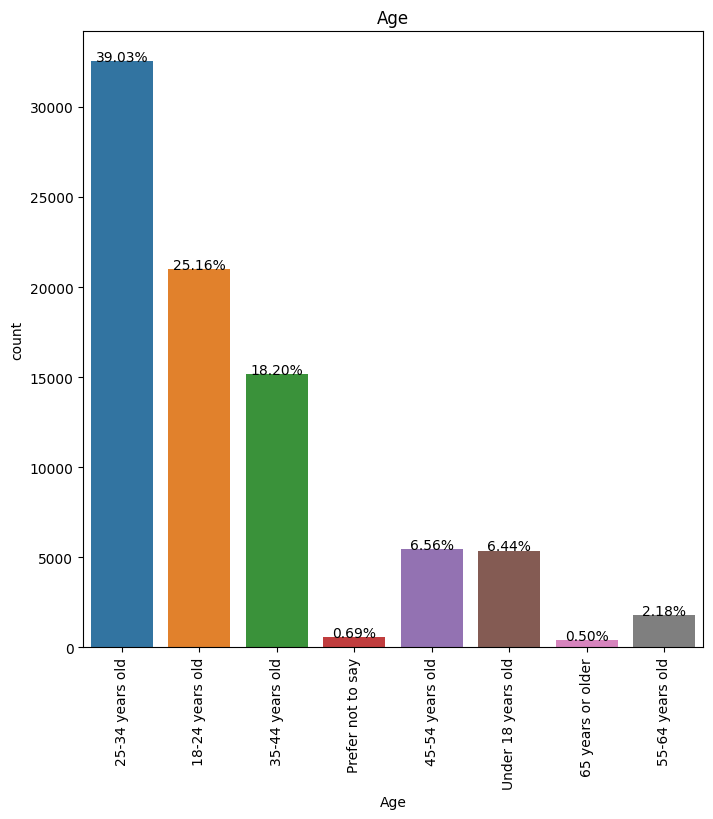

In [113]:
#plotting age variable
countplot('Age', df)

Most developers surveyed are between ages 25-34 years

* GENDER

'Which of the following describe you, if any? Please check all that apply.'

In [114]:
df['Gender'].unique()

array(['Man', 'Prefer not to say', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Man;Or, in your own words:', nan,
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:', 'Man;Woman',
       'Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:',
       'Non-binary, genderqueer, or gender non-conforming;Or, in your own words:',
       'Woman;Or, in your own words:',
       'Man;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:',
       'Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:',
       'Man;Woman;Or, in your own words:'], dtype=object)

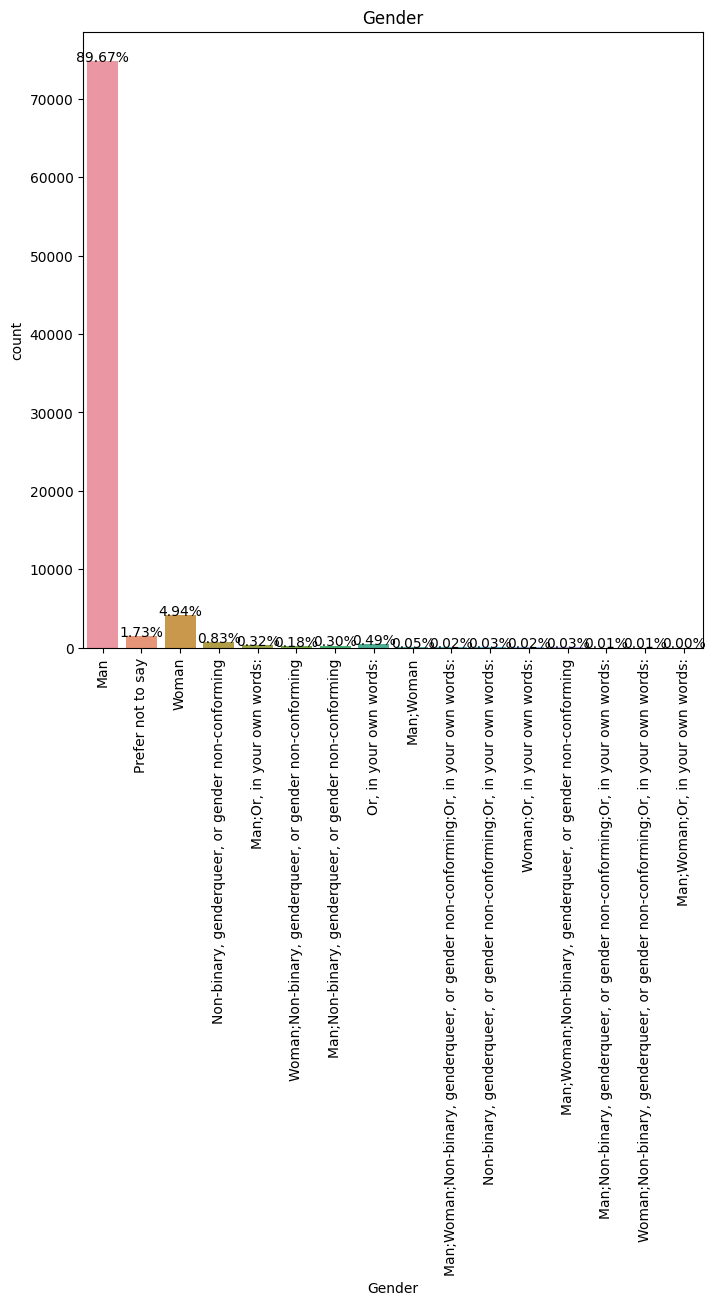

In [115]:
countplot('Gender', df)

There's an obvious imbalance in gender with most developers being surveyed identifying as men. This could potentially affect our model.

* TRANS

'Do you identify as transgender?'

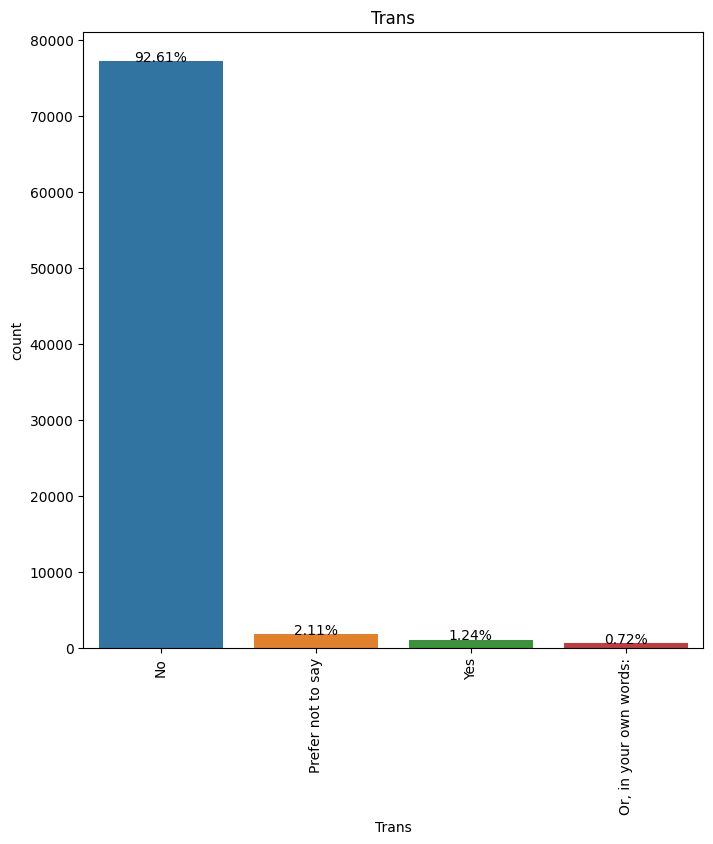

In [116]:
# Plotting Trans
countplot('Trans', df)

More than 90% of the developers surveyed do not identify as trans

* ETHNICITY

'Which of the following describe you, if any?



In [117]:
df['Ethnicity'].unique()

array(['White or of European descent', 'Prefer not to say',
       "I don't know",
       'White or of European descent;Multiracial;Southeast Asian',
       'South Asian',
       'White or of European descent;Hispanic or Latino/a/x',
       'Middle Eastern', 'Multiracial',
       "White or of European descent;I don't know",
       'White or of European descent;Middle Eastern', 'Southeast Asian',
       nan, 'Hispanic or Latino/a/x', 'East Asian',
       'White or of European descent;Biracial', 'Or, in your own words:',
       'Black or of African descent',
       'White or of European descent;East Asian;Biracial',
       'Southeast Asian;South Asian',
       'Southeast Asian;South Asian;East Asian;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)',
       'Multiracial;Black or of African descent',
       'Hispanic or Latino/a/x;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)',
       'White or of European descent;Hispanic 

In [118]:
#Getting most popular ethnic groups
ethnicity_data=df.groupby('Ethnicity').size().sort_values(ascending=False).to_frame().head(13).reset_index()
ethnicity_data

Ethnicity      0
0                        White or of European descent  42671
1                                         South Asian   8328
2                              Hispanic or Latino/a/x   3585
3                                     Southeast Asian   3224
4                                   Prefer not to say   3062
5                                      Middle Eastern   2985
6                                          East Asian   2947
7                                        I don't know   2140
8                         Black or of African descent   2085
9                              Or, in your own words:   2014
10  White or of European descent;Hispanic or Latin...   1155
11        White or of European descent;Middle Eastern    621
12                                        Multiracial    415

In [119]:
ethnicity_data.rename(columns={0: 'count'}, inplace=True)

In [120]:
ethnicity_data

Ethnicity  count
0                        White or of European descent  42671
1                                         South Asian   8328
2                              Hispanic or Latino/a/x   3585
3                                     Southeast Asian   3224
4                                   Prefer not to say   3062
5                                      Middle Eastern   2985
6                                          East Asian   2947
7                                        I don't know   2140
8                         Black or of African descent   2085
9                              Or, in your own words:   2014
10  White or of European descent;Hispanic or Latin...   1155
11        White or of European descent;Middle Eastern    621
12                                        Multiracial    415

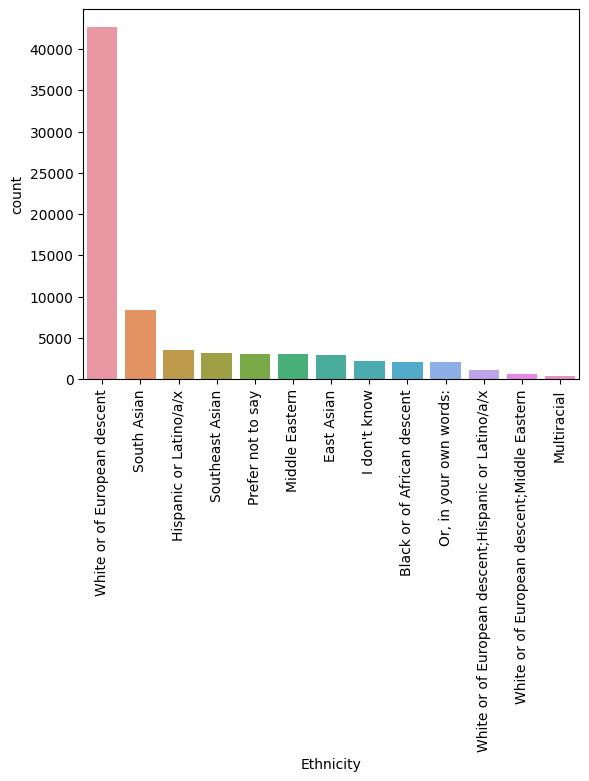

In [121]:
#plotting the dataframe generated
sns.barplot(data=ethnicity_data, x='Ethnicity', y='count')
plt.xticks(rotation=90);

Most developers surveyed are of White or European descent creating some kind of imbalance in the dataset. 

* ACCESSIBILITY 

'Which of the following describe you, if any? Please check all that apply.



In [122]:
df['Accessibility'].value_counts()

None of the above                                                                                                                                                                                           72725
Prefer not to say                                                                                                                                                                                            1918
I am blind / have difficulty seeing                                                                                                                                                                          1030
Or, in your own words:                                                                                                                                                                                        842
I am deaf / hard of hearing                                                                                                                                     

* CONVERTED COMP YEARLY

Yearly compensation converted to dollars

<AxesSubplot: >

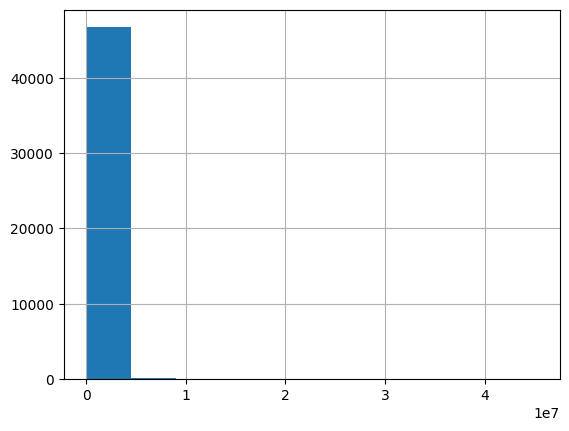

In [123]:
df['ConvertedCompYearly'].hist()


In [124]:
df[df['ConvertedCompYearly']==df['ConvertedCompYearly'].max()]

ResponseId                      MainBranch           Employment  \
66910       66911  I am a developer by profession  I prefer not to say   

       Country US_State UK_Country                    EdLevel     Age1stCode  \
66910  Belgium      NaN        NaN  Primary/elementary school  55 - 64 years   

                    LearnCode  YearsCode  YearsCodePro DevType  \
66910  Books / Physical media        1.0          21.0     NaN   

                                                 OrgSize           Currency  \
66910  Just me - I am a freelancer, sole proprietor, ...  ALL\tAlbanian lek   

          CompTotal CompFreq LanguageHaveWorkedWith LanguageWantToWorkWith  \
66910  5.123468e+09   Yearly                    APL                    NaN   

      DatabaseHaveWorkedWith DatabaseWantToWorkWith PlatformHaveWorkedWith  \
66910              Couchbase                    NaN                    AWS   

      PlatformWantToWorkWith WebframeHaveWorkedWith WebframeWantToWorkWith  \
66910                    NaN                    NaN                    NaN   

      MiscTechHaveWorkedWith MiscTechWantToWorkWith ToolsTechHaveWorkedWith  \
66910                    NaN                    NaN                     NaN   

      ToolsTechWantToWorkWith NEWCollabToolsHaveWorkedWith  \
66910                     NaN             IntelliJ;PyCharm   

      NEWCollabToolsWantToWorkWith                    OpSys  \
66910                          NaN  Other (please specify):   

                                                NEWStuck  \
66910  Visit Stack Overflow;Go for a walk or other ph...   

                                              NEWSOSites  \
66910  Stack Overflow for Teams (private knowledge sh...   

                               SOVisitFreq SOAccount  \
66910  Less than once per month or monthly       Yes   

                                              SOPartFreq          SOComm  \
66910  I have never participated in Q&A on Stack Over...  No, not at all   

      NEWOtherComms              Age Gender Trans Sexuality  \
66910           Yes  55-64 years old    NaN   Yes       NaN   

                         Ethnicity                        Accessibility  \
66910  Black or of African descent  I am blind / have difficulty seeing   

                                            MentalHealth SurveyLength  \
66910  I have a concentration and/or memory disorder ...    Too short   

      SurveyEase  ConvertedCompYearly  
66910        NaN           45241312.0

In [125]:
df=df.drop(66910)

<AxesSubplot: >

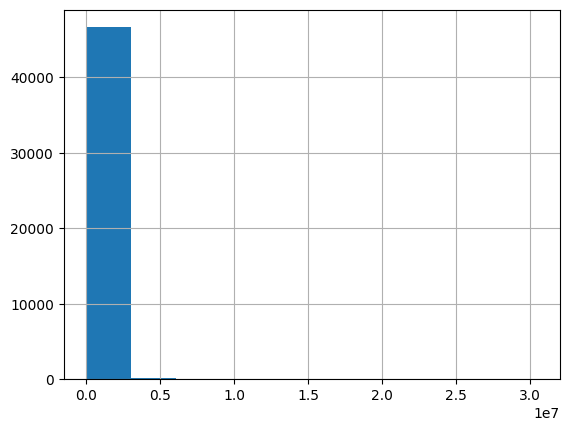

In [126]:
df['ConvertedCompYearly'].hist()

We will need to transfrom the data to fix the extreme skewness that it currently has.

In [127]:
#Exploring data for salaries greater than 10000000 USD
df[df['ConvertedCompYearly']>=10000000]

ResponseId                                         MainBranch  \
3733         3734                     I am a developer by profession   
5305         5306                     I am a developer by profession   
7205         7206                     I am a developer by profession   
7904         7905                     I am a developer by profession   
9189         9190                     I am a developer by profession   
9608         9609  I am not primarily a developer, but I write co...   
10372       10373                     I am a developer by profession   
12700       12701                     I am a developer by profession   
12903       12904                     I am a developer by profession   
20908       20909                     I am a developer by profession   
28791       28792                     I am a developer by profession   
33255       33256                     I am a developer by profession   
35779       35780                     I am a developer by profession   
40586       40587                     I am a developer by profession   
47563       47564                     I am a developer by profession   
52070       52071  I am not primarily a developer, but I write co...   
53028       53029                     I am a developer by profession   
64111       64112                     I am a developer by profession   
65399       65400                     I am a developer by profession   
66323       66324  I am not primarily a developer, but I write co...   
66488       66489                     I am a developer by profession   

                                              Employment  \
3733   Independent contractor, freelancer, or self-em...   
5305   Independent contractor, freelancer, or self-em...   
7205   Independent contractor, freelancer, or self-em...   
7904                                  Employed full-time   
9189                                  Employed full-time   
9608                                  Employed full-time   
10372                                 Employed full-time   
12700                                 Employed full-time   
12903                                 Employed full-time   
20908                                 Employed full-time   
28791                                 Employed full-time   
33255                                 Employed full-time   
35779                                 Employed full-time   
40586                                 Employed full-time   
47563                                 Employed full-time   
52070                                 Employed full-time   
53028                                 Employed full-time   
64111                                 Employed full-time   
65399                                 Employed full-time   
66323                                 Employed full-time   
66488                                 Employed full-time   

                        Country        US_State UK_Country  \
3733   United States of America        Virginia        NaN   
5305   United States of America      New Jersey        NaN   
7205   United States of America  South Carolina        NaN   
7904   United States of America      Washington        NaN   
9189   United States of America      Washington        NaN   
9608   United States of America        New York        NaN   
10372  United States of America     Connecticut        NaN   
12700                     India             NaN        NaN   
12903                    Serbia             NaN        NaN   
20908  United States of America           Texas        NaN   
28791                     India             NaN        NaN   
33255  United States of America         Florida        NaN   
35779  United States of America    Pennsylvania        NaN   
40586  United States of America      California        NaN   
47563  United States of America        Colorado        NaN   
52070  United States of America      California        NaN   
53028  United States of America        Missouri

# Bivariate And Multivariate Analysis

C:\Users\JESSICA\AppData\Local\Temp\ipykernel_12936\953626132.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


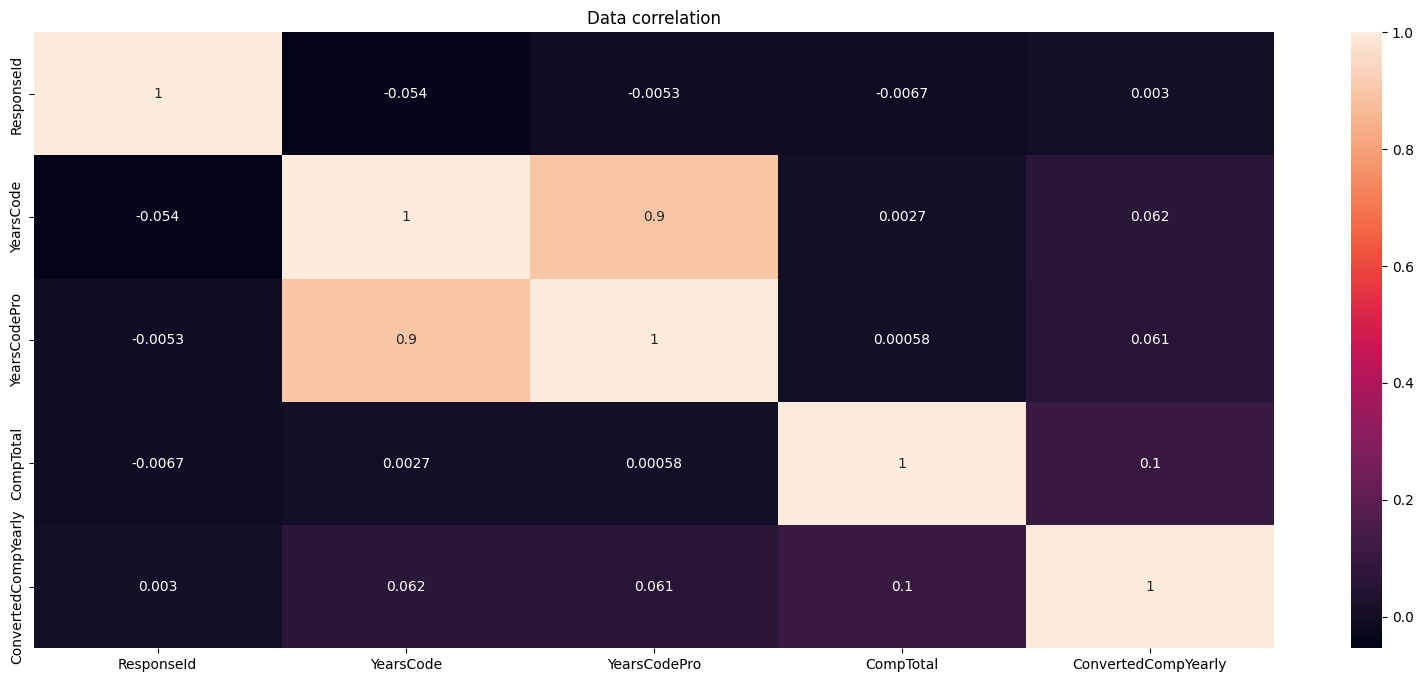

In [128]:
#Generating correlation matrix for continuous variables
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Data correlation')
plt.show()

As expected there is a high positive correlation between years of professional coding experience and years of total coding experience

In [129]:
#Dropping some categorical variable columns, these are variables related to the survey and stackoverflow 
df=df.drop(columns=['NEWCollabToolsWantToWorkWith', 'OpSys','NEWStuck',  'NEWSOSites', 'SOVisitFreq',  'SOAccount', 'SOPartFreq', 'SOComm', 'NEWOtherComms', 'SurveyLength', 'SurveyEase' ])

In [130]:
#Because current earning are not determined by tech stack developers do not yet know, we will drop some more categorical variables
df=df.drop(columns=['LanguageWantToWorkWith', 'DatabaseWantToWorkWith','PlatformWantToWorkWith', 'WebframeWantToWorkWith', 'MiscTechWantToWorkWith','ToolsTechWantToWorkWith',  'MentalHealth', 'Trans', 'ResponseId' ])


In [131]:
#Categorical variables in dataframe
cat=[cols for cols in df.columns if df[cols].dtype != 'float64']
cat

['MainBranch',
 'Employment',
 'Country',
 'US_State',
 'UK_Country',
 'EdLevel',
 'Age1stCode',
 'LearnCode',
 'DevType',
 'OrgSize',
 'Currency',
 'CompFreq',
 'LanguageHaveWorkedWith',
 'DatabaseHaveWorkedWith',
 'PlatformHaveWorkedWith',
 'WebframeHaveWorkedWith',
 'MiscTechHaveWorkedWith',
 'ToolsTechHaveWorkedWith',
 'NEWCollabToolsHaveWorkedWith',
 'Age',
 'Gender',
 'Sexuality',
 'Ethnicity',
 'Accessibility']

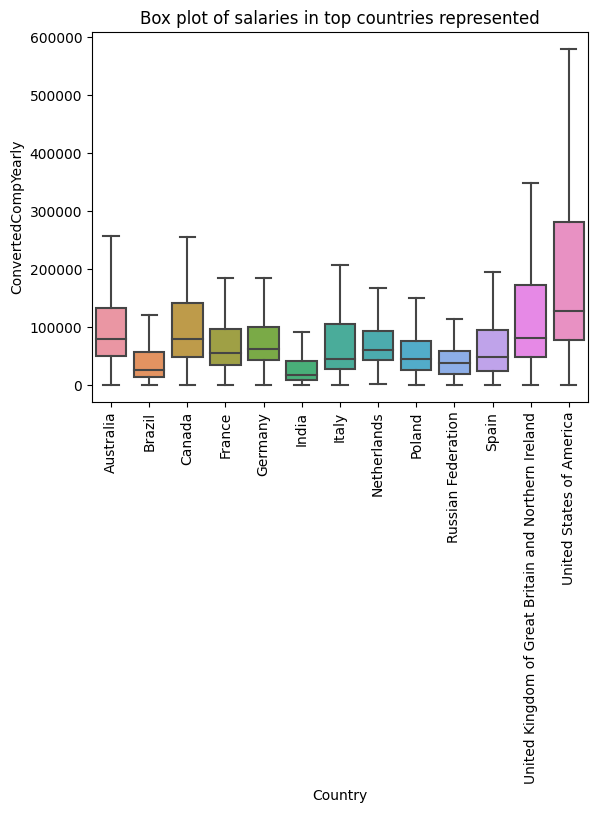

In [166]:
#Plotting the distribution of salaries among countries
comp_data=df.groupby(['Country', 'ConvertedCompYearly']).size().to_frame().reset_index()
for i in comp_data['Country'].unique():
    if i not in country_data['Country'].unique():
        comp_data.drop(comp_data[comp_data['Country']==i].index, inplace=True)
sns.boxplot(data=comp_data, x='Country', y='ConvertedCompYearly', showfliers=False)
plt.title('Box plot of salaries in top countries represented')
plt.xticks(rotation=90);

From the boxplot, developers in the US seem to be earning more yearly than their counterparts in Europe, India and Australia. Developers in India have the lowest median salary of the most represented countries.

Text(0.5, 1.0, 'Boxplot of EdLevel Against Yearly Compensation')

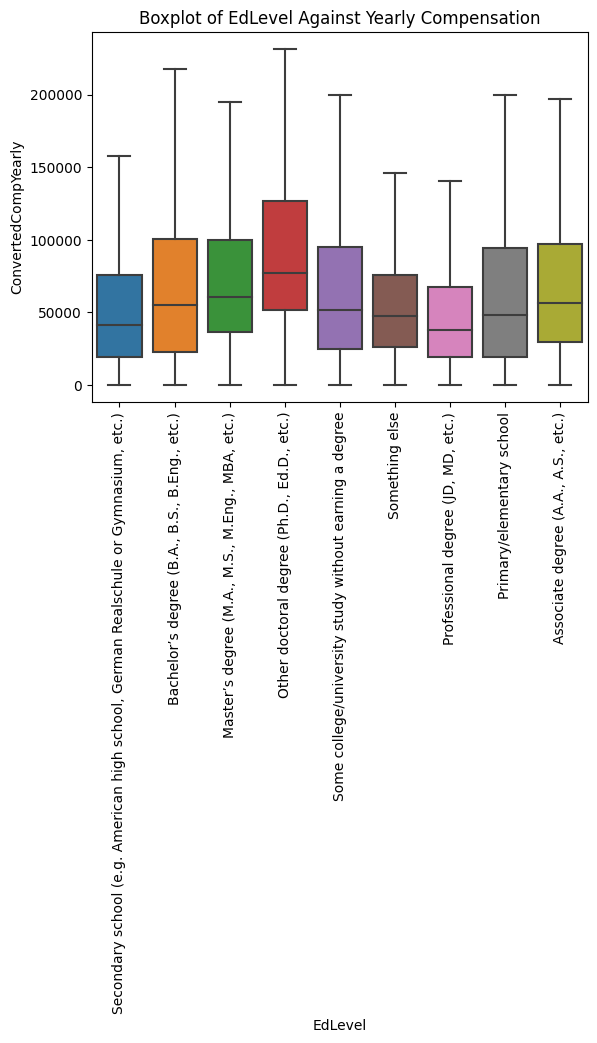

In [171]:
#Exploring how yearly salary changes with education level
sns.boxplot(data=df, x='EdLevel', y='ConvertedCompYearly', showfliers=False)
plt.xticks(rotation=90)
plt.title('Boxplot of EdLevel Against Yearly Compensation')

Doctoral Degree holders seem to earn the most salaries although there isn't a great difference between their maximum and that notices in Bachelors' degree holders. Obviously, other factors like years of experience will play a dynamic role in determining salary earned yearly.

Text(0.5, 1.0, 'Plot of pro years of coding experience against comp(less than median)')

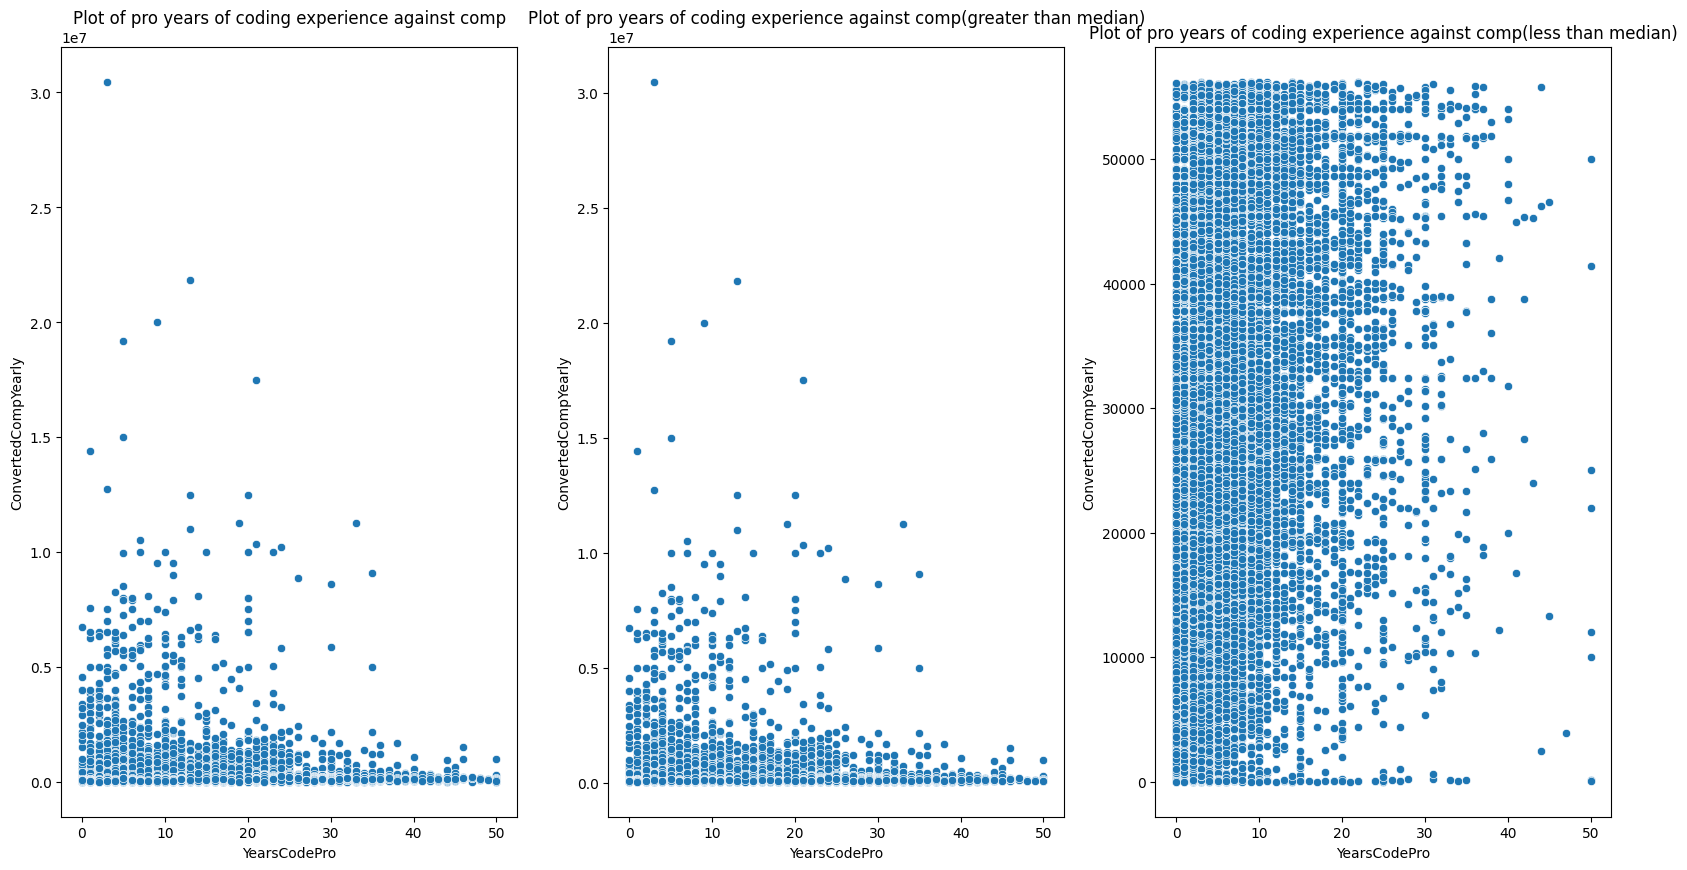

In [184]:
#Visualizing how years of professional coding experience varies with yearly compensation
plt.figure(figsize=[20,10])

plt.subplot(1,3,1)
sns.scatterplot(data=df, x='YearsCodePro', y='ConvertedCompYearly')
plt.title('Plot of pro years of coding experience against comp')

#Plotting compensations greater than the median compensation
plt.subplot(1,3,2)
sns.scatterplot(data=df[df['ConvertedCompYearly']>df['ConvertedCompYearly'].median()], x='YearsCodePro', y='ConvertedCompYearly')
plt.title('Plot of pro years of coding experience against comp(greater than median)')

#Plotting compensations less than the median compensation
plt.subplot(1,3,3)
sns.scatterplot(data=df[df['ConvertedCompYearly']<df['ConvertedCompYearly'].median()], x='YearsCodePro', y='ConvertedCompYearly')
plt.title('Plot of pro years of coding experience against comp(less than median)')

There is the obvious appearance of outliers in the plots with no obvious trend. Something interesting worthy of note is that developers surveyed with more than 50 years of experience do not necessarily earn more than their counterparts with lesser years of experience.

Text(0.5, 1.0, 'Box plot of Organization Size Against Yearly Compensation')

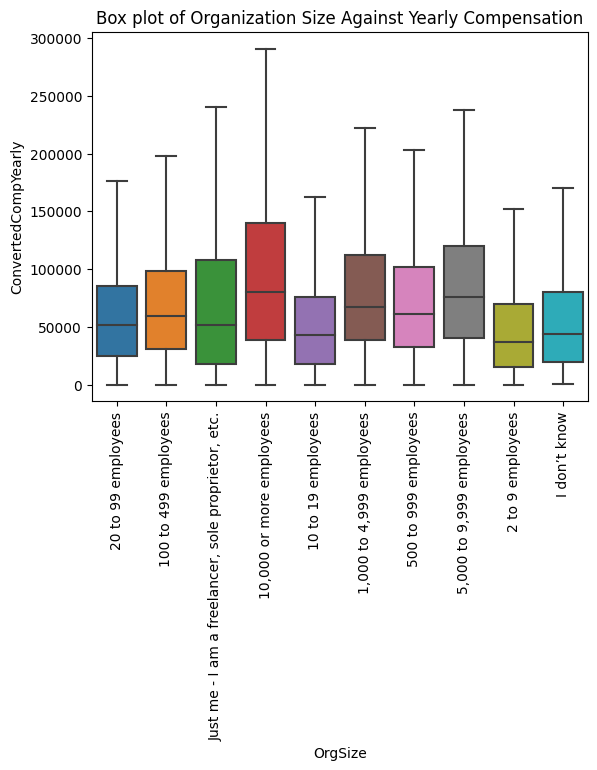

In [189]:
#Visualizing how organization size varies with yearly compensation
sns.boxplot(data=df, x='OrgSize', y='ConvertedCompYearly', showfliers=False)
plt.xticks(rotation=90)
plt.title('Box plot of Organization Size Against Yearly Compensation')

Developers surveyed that worked in firms with an organization size between 10,000 and more employees reported the highest yearly compensation than others.

In [204]:
#Creating dataset for feature selection and model building 
final_data=df.copy()
final_data=final_data[final_data['MainBranch']=='I am a developer by profession']
final_data.head()

MainBranch  \
0  I am a developer by profession   
3  I am a developer by profession   
4  I am a developer by profession   
8  I am a developer by profession   
9  I am a developer by profession   

                                          Employment  \
0  Independent contractor, freelancer, or self-em...   
3                                 Employed full-time   
4  Independent contractor, freelancer, or self-em...   
8                                 Employed part-time   
9                                 Employed full-time   

                                             Country US_State UK_Country  \
0                                           Slovakia      NaN        NaN   
3                                            Austria      NaN        NaN   
4  United Kingdom of Great Britain and Northern I...      NaN    England   
8                                              India      NaN        NaN   
9                                             Sweden      NaN        NaN   

                                             EdLevel     Age1stCode  \
0  Secondary school (e.g. American high school, G...  18 - 24 years   
3    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  11 - 17 years   
4    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   5 - 10 years   
8       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  18 - 24 years   
9    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  11 - 17 years   

                                           LearnCode  YearsCode  YearsCodePro  \
0  Coding Bootcamp;Other online resources (ex: vi...        NaN           NaN   
3                                                NaN        NaN           NaN   
4                            Friend or family member       17.0          10.0   
8                                    Coding Bootcamp        6.0           4.0   
9                                             School        7.0           4.0   

                                             DevType  \
0                                  Developer, mobile   
3                               Developer, front-end   
4  Developer, desktop or enterprise applications;...   
8                               Developer, front-end   
9      Data scientist or machine learning specialist   

                                             OrgSize             Currency  \
0                                 20 to 99 employees    EUR European Euro   
3                               100 to 499 employees    EUR European Euro   
4  Just me - I am a freelancer, sole proprietor, ...  GBP\tPound sterling   
8                           10,000 or more employees    INR\tIndian rupee   
9                                 10 to 19 employees   SEK\tSwedish krona   

   CompTotal CompFreq                         LanguageHaveWorkedWith  \
0     4800.0  Monthly  C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift   
3        NaN  Monthly                          JavaScript;TypeScript   
4        NaN      NaN                 Bash/Shell;HTML/CSS;Python;SQL   
8        NaN  Monthly                            HTML/CSS;JavaScript   
9    42000.0  Monthly                                     C++;Python   

           DatabaseHaveWorkedWith PlatformHaveWorkedWith  \
0               PostgreSQL;SQLite                    NaN   
3                             NaN                    NaN   
4  Elasticsearch;PostgreSQL;Redis                    NaN   
8                      PostgreSQL                    AWS   
9                      PostgreSQL                    NaN   

  WebframeHaveWorkedWith                       MiscTechHaveWorkedWith  \
0        Laravel;Symfony                                          NaN   
3         Angular;jQuery                                          NaN   
4                  Flask             Apache Spark;Hadoop;NumPy;Pandas   
8         Django;FastAPI                                          NaN   
9                    NaN  Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch   

      ToolsTechHaveWorkedWith                NEWCollabTools

In [205]:
#We are using the countries in country_data
for i in final_data['Country'].unique():
    if i not in country_data['Country'].unique():
        final_data.drop(final_data[final_data['Country']==i].index, inplace=True)

final_data.head()

MainBranch  \
4   I am a developer by profession   
8   I am a developer by profession   
10  I am a developer by profession   
11  I am a developer by profession   
12  I am a developer by profession   

                                           Employment  \
4   Independent contractor, freelancer, or self-em...   
8                                  Employed part-time   
10                                 Employed full-time   
11                                 Employed full-time   
12                                 Employed full-time   

                                              Country US_State UK_Country  \
4   United Kingdom of Great Britain and Northern I...      NaN    England   
8                                               India      NaN        NaN   
10  United Kingdom of Great Britain and Northern I...      NaN    England   
11                                              Spain      NaN        NaN   
12                                            Germany      NaN        NaN   

                                            EdLevel     Age1stCode  \
4   Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   5 - 10 years   
8      Bachelor’s degree (B.A., B.S., B.Eng., etc.)  18 - 24 years   
10     Bachelor’s degree (B.A., B.S., B.Eng., etc.)  11 - 17 years   
11     Bachelor’s degree (B.A., B.S., B.Eng., etc.)  11 - 17 years   
12  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  11 - 17 years   

                                            LearnCode  YearsCode  \
4                             Friend or family member       17.0   
8                                     Coding Bootcamp        6.0   
10    Other online resources (ex: videos, blogs, etc)       16.0   
11  Other online resources (ex: videos, blogs, etc...       12.0   
12                            Other (please specify):       15.0   

    YearsCodePro                                            DevType  \
4           10.0  Developer, desktop or enterprise applications;...   
8            4.0                               Developer, front-end   
10          10.0                                Developer, back-end   
11           5.0                                Developer, back-end   
12           6.0  Developer, desktop or enterprise applications;...   

                                              OrgSize             Currency  \
4   Just me - I am a freelancer, sole proprietor, ...  GBP\tPound sterling   
8                            10,000 or more employees    INR\tIndian rupee   
10                           10,000 or more employees  GBP\tPound sterling   
11                                 10 to 19 employees    EUR European Euro   
12                           1,000 to 4,999 employees    EUR European Euro   

    CompTotal CompFreq                             LanguageHaveWorkedWith  \
4         NaN      NaN                     Bash/Shell;HTML/CSS;Python;SQL   
8         NaN  Monthly                                HTML/CSS;JavaScript   
10        NaN      NaN                                      C#;TypeScript   
11    43000.0   Yearly  Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...   
12    71500.0   Yearly                               C;C++;Java;Perl;Ruby   

            DatabaseHaveWorkedWith PlatformHaveWorkedWith  \
4   Elasticsearch;PostgreSQL;Redis                    NaN   
8                       PostgreSQL                    AWS   
10     Microsoft SQL Server;Oracle        Microsoft Azure   
11                      PostgreSQL                    AWS   
12                             NaN                    NaN   

     WebframeHaveWorkedWith            MiscTechHaveWorkedWith  \
4                     Flask  Apache Spark;Hadoop;NumPy;Pandas   
8            Django;FastAPI                               NaN   
10    Angular;ASP.NET Core                 .NET Core / .NET 5   
11  Express;React.js;Vue.js                               NaN   
12            Ruby on Rails                                Qt   

       ToolsTechHaveWorkedWith            

In [206]:
#Dropping columns not needed 
final_data=final_data.drop(columns=['MainBranch', 'Age1stCode', 'LearnCode', 'Currency',  'CompTotal', 'CompFreq', 'Sexuality', 'Accessibility' ])

In [207]:
final_data.columns

Index(['Employment', 'Country', 'US_State', 'UK_Country', 'EdLevel',
       'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith',
       'NEWCollabToolsHaveWorkedWith', 'Age', 'Gender', 'Ethnicity',
       'ConvertedCompYearly'],
      dtype='object')

In [198]:
final_data.to_csv('final_data.csv')